In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
# Importing the mt_cars dataset
df = pd.read_csv('C:/Users/satyam/Desktop/Data Science/Supervised Linear Regression/mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Analyze the Data

In [3]:
# Shape of the dataset
df.shape

(32, 12)

In [4]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
# Checking if there are any null values
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [6]:
# Statistical summary
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [7]:
df2 = df.iloc[:, 1:]
df2.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


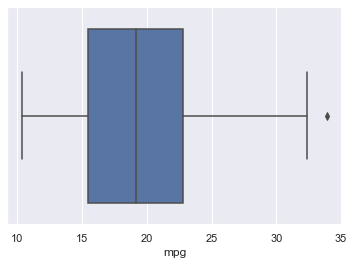

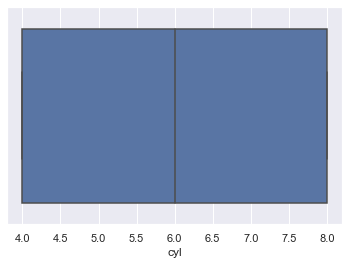

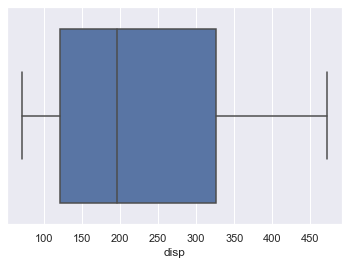

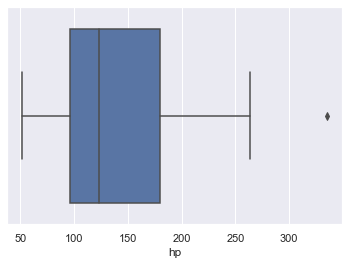

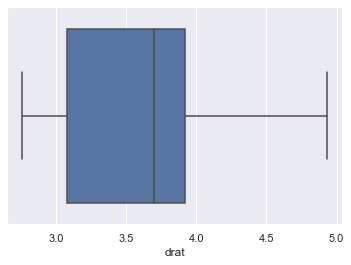

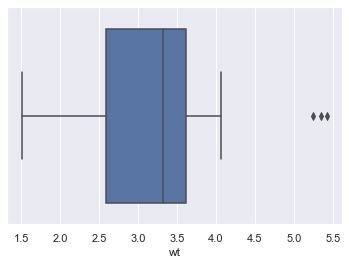

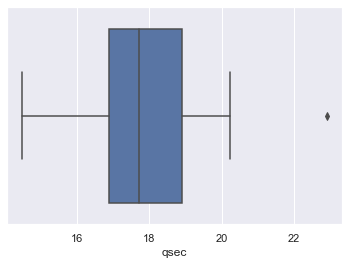

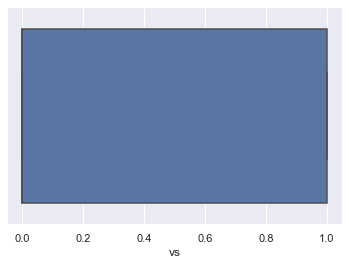

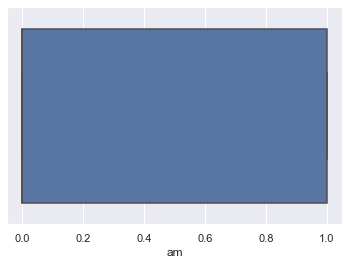

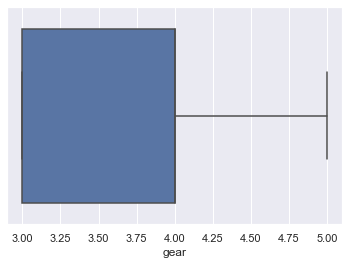

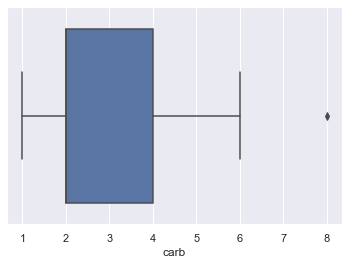

In [8]:
# Checking if there are any outliers in the dataset

for x in df2.columns:
    sns.boxplot(df2[x])
    plt.show()

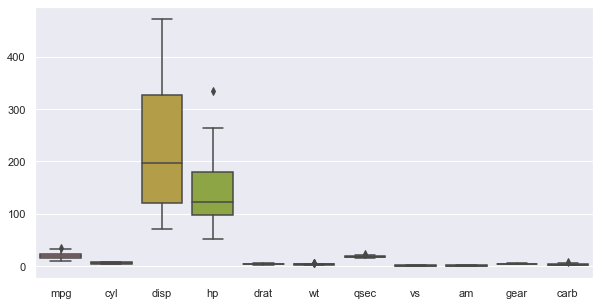

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.show()

(11.0, 0.0)

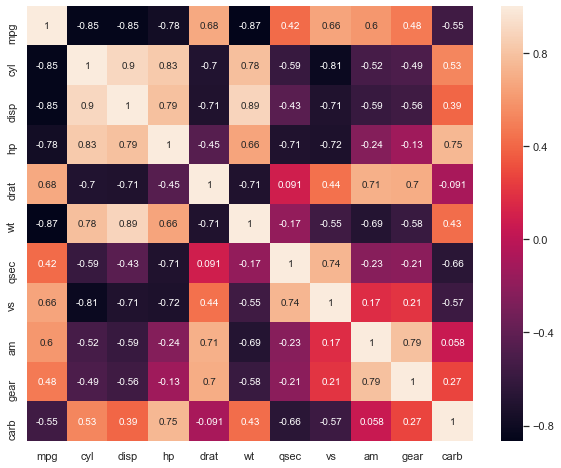

In [10]:
# Checking the correlation between the features
plt.figure(figsize = (10,8))
ax = sns.heatmap(df.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

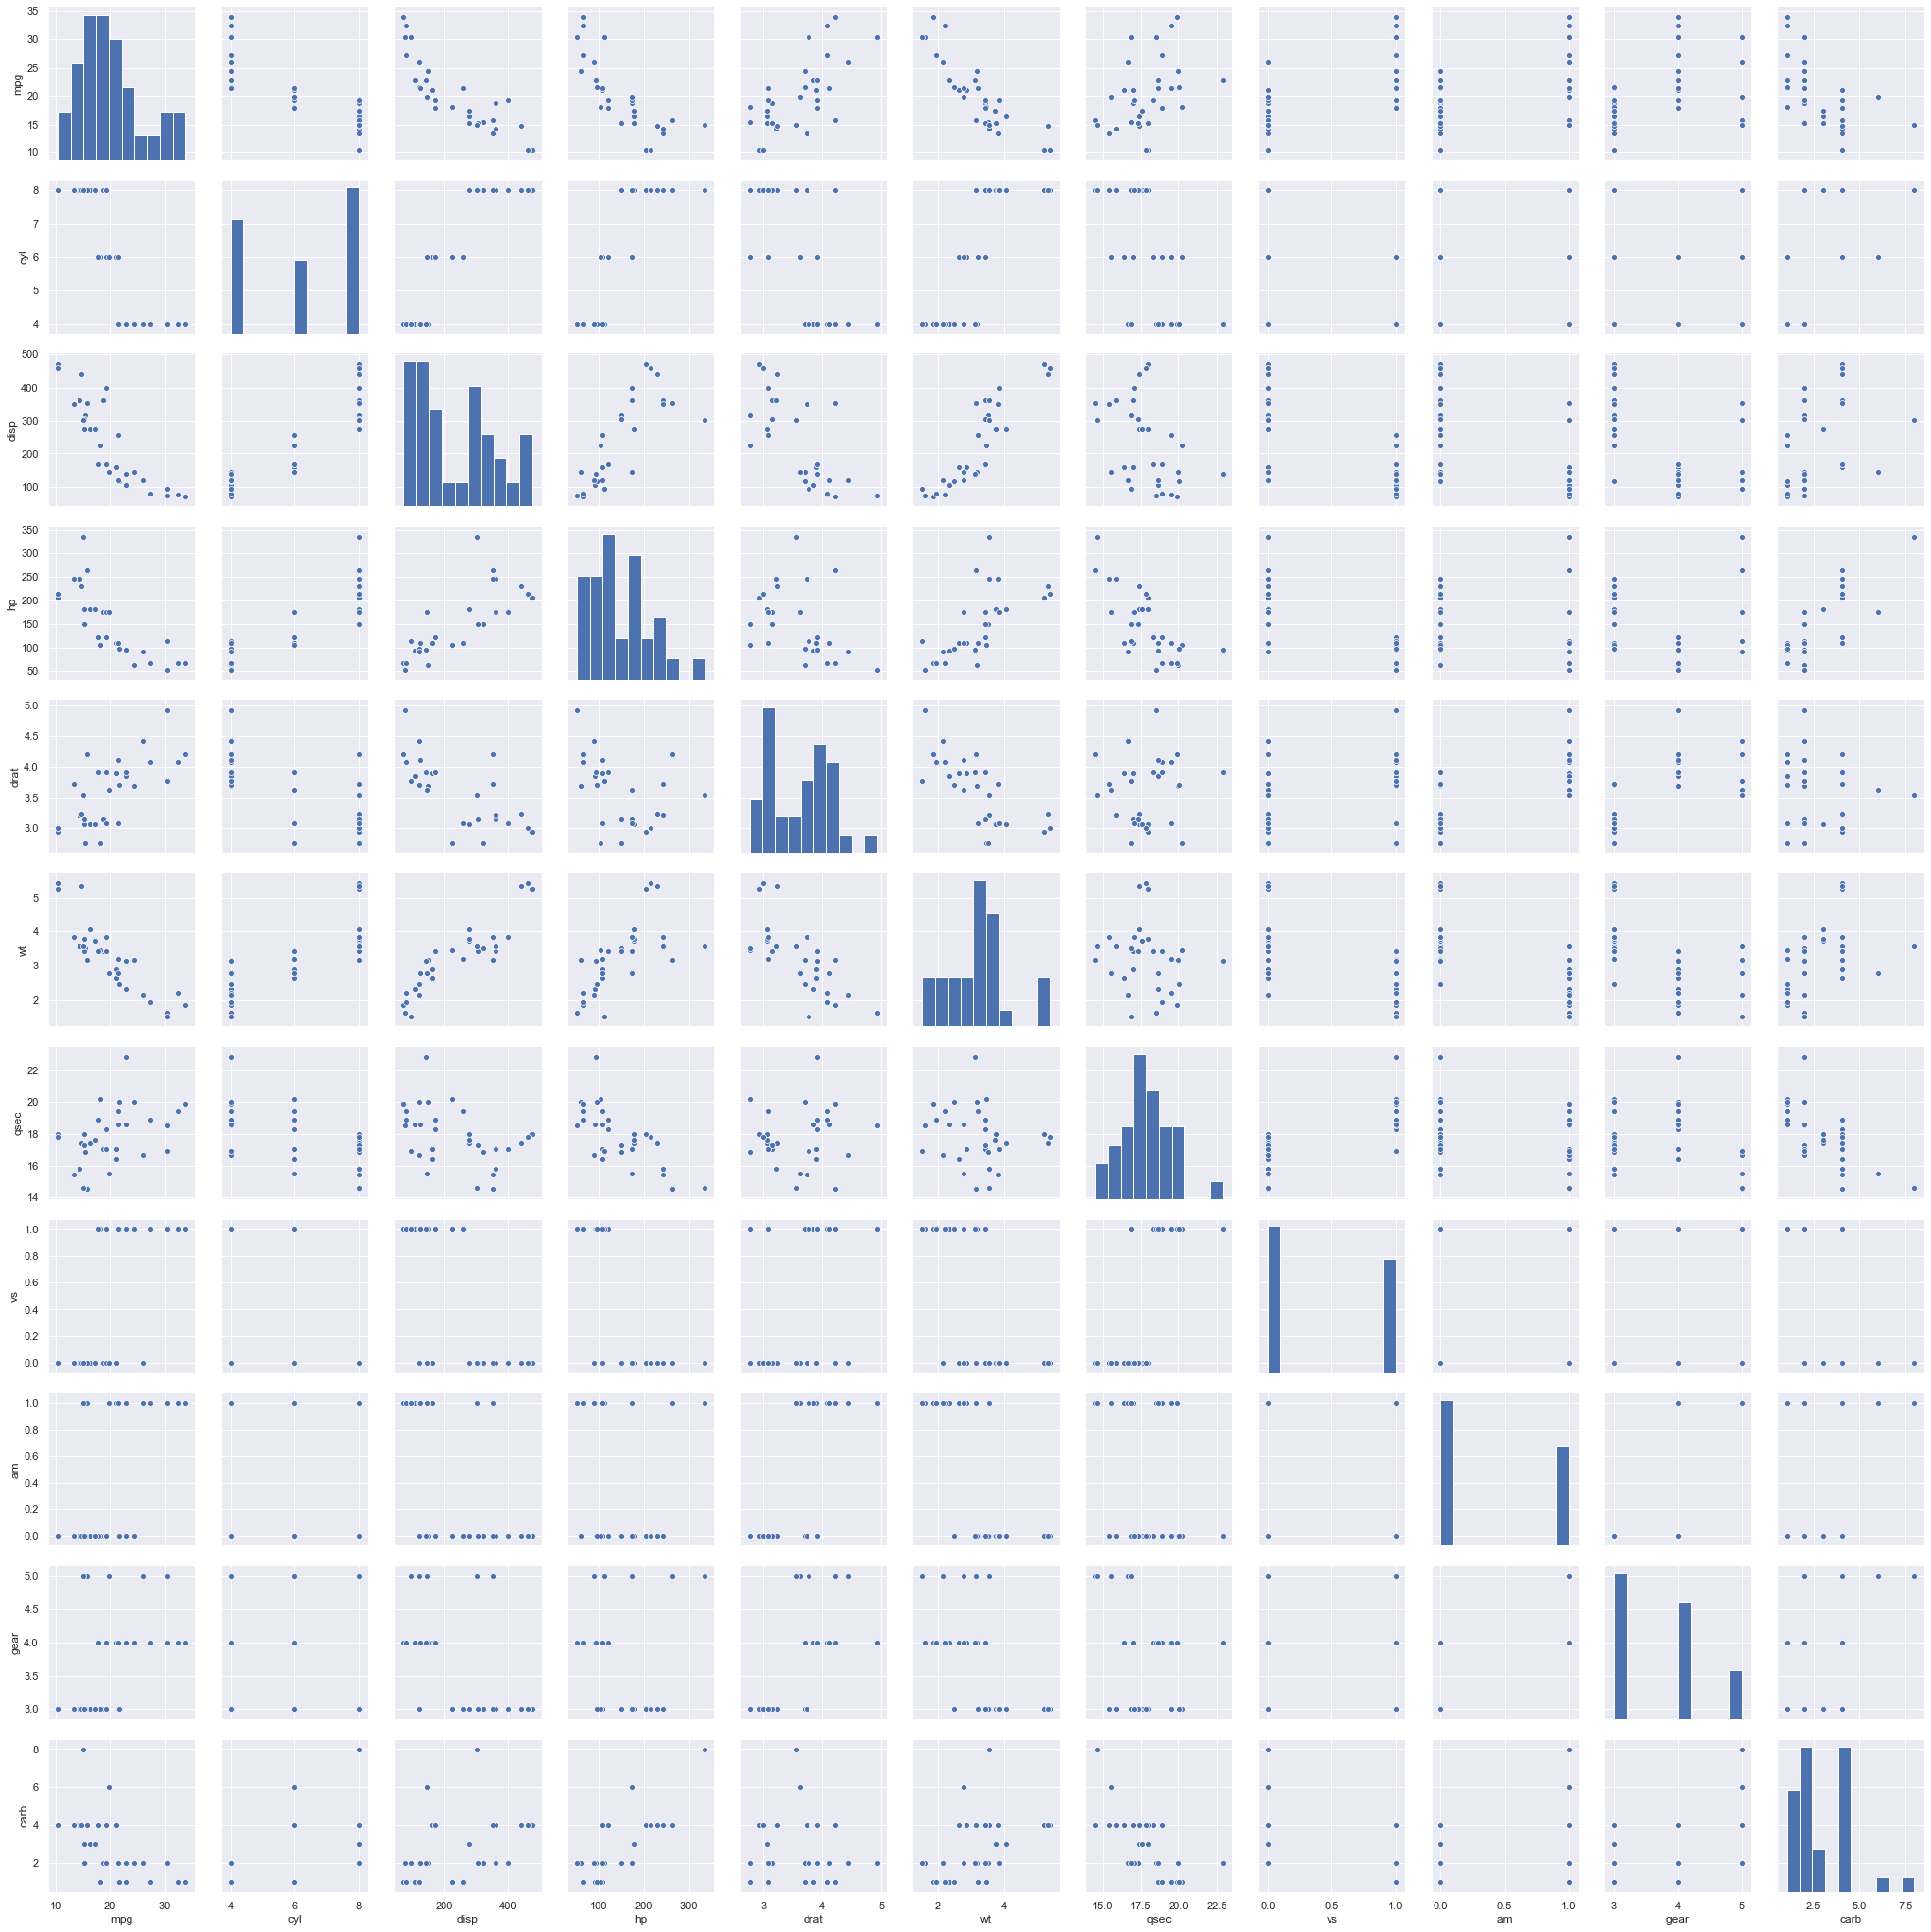

In [11]:
sns.pairplot(data=df)

Since mpg has the strong correlation with the other features of the dataset, hence we will select mpg as the target variable

In [12]:
# Treating the outliers of the mpg column

q1 = 15.425
q3 = 22.8
iqr = q3-q1
lowl = q1-1.5*iqr
uppl = q3+ 1.5*iqr
print("Lower limit is",lowl, ":", "Upper limit is", uppl)

Lower limit is 4.362500000000001 : Upper limit is 33.8625


In [13]:
# Removing the outlier from dataset

df = df[(df['mpg'] > lowl) & (df['mpg']<uppl)]
df.shape

(31, 12)

## Building the model

In [14]:
X = df.drop(columns=['mpg', 'model'], axis=1)
y = df.mpg

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 10)
(11, 10)
(20,)
(11,)


In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.9009820933885444
R^2 score for test: 0.7317021975924581


In [18]:
# OLS Model

import statsmodels.api as sm
Xc = sm.add_constant(X)

model = sm.OLS(y, Xc).fit()
model.summary()

C:\Users\satyam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     13.18
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           9.46e-07
Time:                        15:31:28   Log-Likelihood:                -65.273
No. Observations:                  31   AIC:                             152.5
Df Residuals:                      20   BIC:                             168.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0740     18.126      1.218      0.237     -15.737      59.885
cyl           -0.4538      0.990     -0.458      0.652      -2.519       1.611
disp           0.0116      0.017      0.697      0.494      -0.023       0.046
hp            -0.0238      0.020     -1.168      0.257      -0.066       0.019
drat           0.4844      1.534      0.316      0.755      -2.715       3.684
wt            -3.1673      1.789     -1.770      0.092      -6.899       0.564
qsec           0.3651      0.718      0.508      0.617      -1.134       1.864
vs             0.4104      1.965      0.209      0.837      -3.688       4.509
am             1.4394      1.993      0.722      0.478      -2.717       5.596
gear           0.8786      1.398      0.628      0.537      -2.038       3.795
carb          -0.2217      0.774     -0.287      0.777      -1.836       1.392
==============================================================================
Omnibus:                        4.115   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                2.974
Skew:                           0.750   Prob(JB):                        0.226
Kurtosis:                       3.233   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumptions of Linear Regression

C:\Users\satyam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


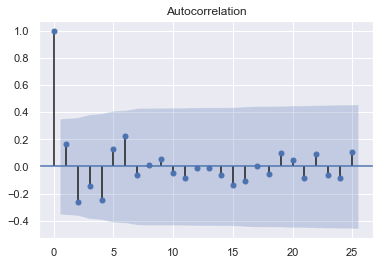

In [19]:
# 1. No Auto-correlation among the residuals

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model.resid, lags=25, alpha=0.05)
acf.show()

In [20]:
# 2. Normality in residuals

from scipy import stats
print(stats.jarque_bera(model.resid))  

(2.9739233093046096, 0.22605845682187908)


Since pvalue is greator than 0.05, we will accept H0 and conclude that the residuals are normally distributed. 

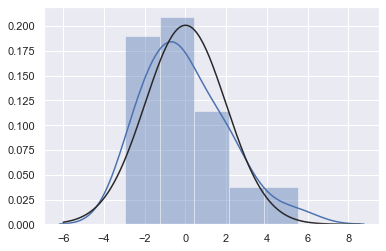

In [21]:
from scipy.stats import norm
norm.fit(model.resid)
sns.distplot(model.resid, fit=norm)
plt.show()

### Linearity Of Relationship(Check Of Residual Data Pattern)

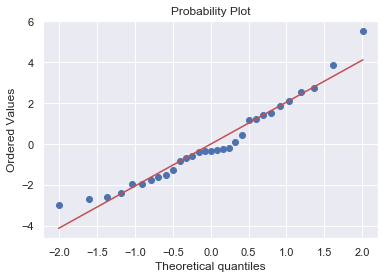

In [28]:
# Linearity in residuals

from scipy import stats
stats.probplot(model.resid, plot=plt)
plt.show()

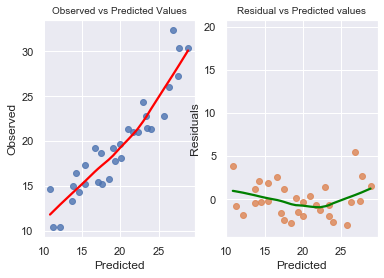

In [31]:
fitted_vals = model.predict()
resids = model.resid

fig, ax = plt.subplots(1,2)

sns.regplot(x = fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color':'red'})
ax[0].set_title("Observed vs Predicted Values", fontsize=10)
ax[0].set(xlabel="Predicted", ylabel="Observed")

sns.regplot(x = fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color':'green'})
ax[1].set_title("Residual vs Predicted values", fontsize=10)
ax[1].set(xlabel="Predicted", ylabel="Residuals")
plt.show()

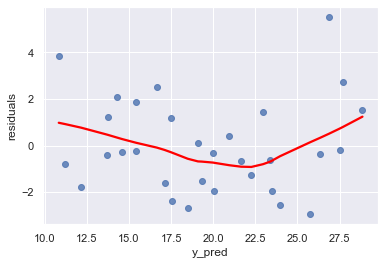

In [32]:
model = sm.OLS(y, Xc).fit()
y_pred = model.predict(Xc)
resids = model.resid

sns.regplot(x=y_pred, y=resids, lowess=True, line_kws={'color' : 'red'})
plt.xlabel('y_pred')
plt.ylabel('residuals')
plt.show()

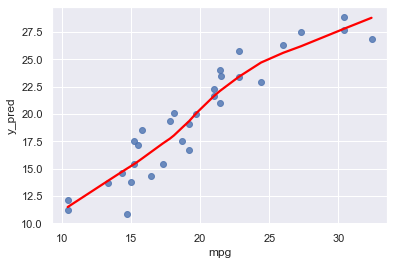

In [33]:
X = df.drop(columns=['mpg', 'model'], axis=1)  
y = df['mpg']

sns.regplot(x=y, y=y_pred, lowess=True, line_kws={'color':'red'})
plt.xlabel('mpg')
plt.ylabel('y_pred')
plt.show() 

The plot shows that there is a trend in the residuals. It has larger values for residuals for lower y_pred and higher y_pred.

### Goldfeld test for checking Homoscedasticity

In [34]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F-statistics', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
print(lzip(name, test))

[('F-statistics', 25.180329568836527), ('p-value', 0.0016449850779673705)]


### Rainbow Test for the linearity of residuals

In [39]:
import statsmodels.api as sm

name = ['F-statistics', 'p-value']
test = sm.stats.diagnostic.linear_rainbow(res=model, frac=0.5)
print(lzip(name, test))

[('F-statistics', 3.258600557650094), ('p-value', 0.13086958317875602)]


H0: Residuals exhibit linearity   H1: Residuals exhibit non-linearity

Based on the test we can conclude that there is no serious non-linearity as the p-value(0.13) is greator than alpha.